In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import time
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
files.upload()

Saving Question 1 data.csv to Question 1 data.csv


{'Question 1 data.csv': b'X,Y\r\n664159,550946\r\n665845,557965\r\n597173,575538\r\n618600,551446\r\n635690,608046\r\n588100,557588\r\n582015,546191\r\n604678,574577\r\n572029,518313\r\n604737,574591\r\n577728,587566\r\n602013,574722\r\n627968,574625\r\n607269,536961\r\n603145,574795\r\n671919,571761\r\n612184,570393\r\n600032,575310\r\n627912,593892\r\n601967,604428\r\n591851,569051\r\n601444,572693\r\n629718,558104\r\n661430,603567\r\n597551,556737\r\n601182,582584\r\n562704,570596\r\n605107,563429\r\n607214,575069\r\n568824,570203\r\n612485,518009\r\n589244,573777\r\n625579,551084\r\n560237,500154\r\n626224,569687\r\n610666,551701\r\n597428,569940\r\n600582,599535\r\n604168,555003\r\n613871,550423\r\n617310,551945\r\n625728,579460\r\n606300,566708\r\n638559,558807\r\n582176,630383\r\n544056,577786\r\n631297,578351\r\n561574,621747\r\n604973,574773\r\n605284,556134\r\n617910,592293\r\n555904,640401\r\n526559,509417\r\n603849,572396\r\n598634,619900\r\n603359,589262\r\n657455,567754\r

In [4]:
df = pd.read_csv('Question 1 data.csv')
df.head()

,X,Y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


In [5]:
dtypes = df.dtypes
dtypes

,0
X,int64
Y,int64


In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

duplicates = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)

summary = df.describe()
print("\nSummary Statistics:\n", summary)

Missing Values:
 X    0
Y    0
dtype: int64

Number of Duplicate Rows: 0

Summary Statistics:
                    X              Y
count    5000.000000    5000.000000
mean   514937.556600  494709.292800
std    244465.901926  235840.852969
min     19835.000000   51121.000000
25%    320352.500000  320107.750000
50%    505338.500000  526259.500000
75%    786228.750000  713713.500000
max    961951.000000  970756.000000


In [7]:
# Normalize data using min-max normalization
df_normalized = (df - df.min()) / (df.max() - df.min())
df_normalized.head()

,X,Y
0,0.683912,0.543504
1,0.685701,0.551136
2,0.612810,0.570245
3,0.635553,0.544047
4,0.653693,0.605594


<ipython-input-7-06c01082e4df>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df_normalized['X'], y=df_normalized['Y'], palette='coolwarm')


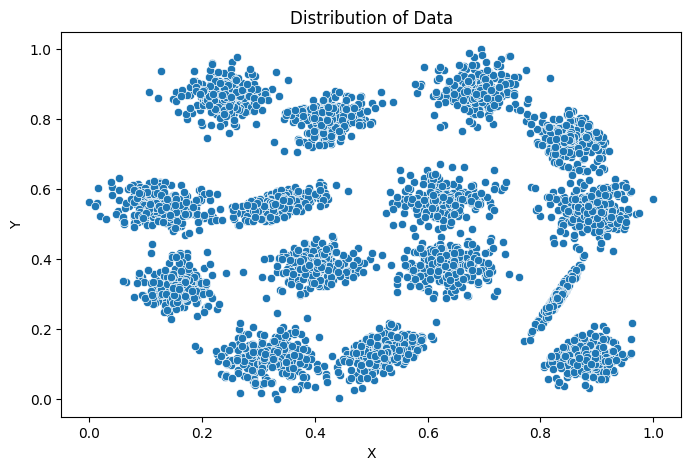

In [ ]:
# Distribution of Data
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_normalized['X'], y=df_normalized['Y'], palette='coolwarm')
plt.title("Distribution of Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [8]:
# Part-A

from sklearn.cluster import KMeans, BisectingKMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

global_mean = df_normalized.mean()


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)



Execution Time: 0.0151 seconds
WCSS = 10.2871
BCSS = 655.0790
SSE: 665.3661
Silhouette Score: 0.7116



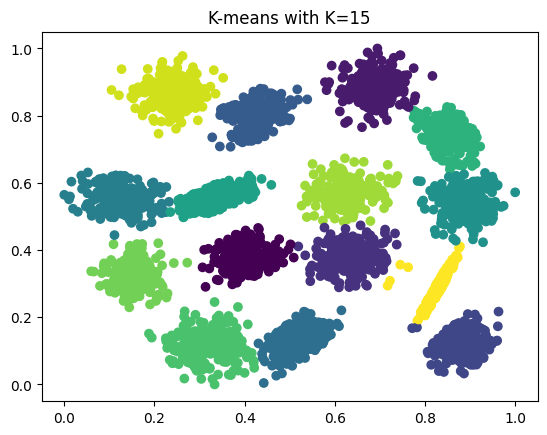

In [ ]:
# Applying K-means

start_time = time.time()

kmeans = KMeans(n_clusters=15)
kmeans.fit(df_normalized)

end_time = time.time()
final_time = end_time - start_time

# Errors

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

wcss = sum(np.sum((df_normalized[labels == k] - centroids[k])**2).sum() for k in range(len(centroids)))
bcss = sum(len(df_normalized[labels == k]) * np.sum((global_mean - centroids[k])**2) for k in range(len(centroids)))

# Silhouette Coefficient
sil_score = silhouette_score(df_normalized, labels)

print(f'\nExecution Time: {final_time:0.4f} seconds')
print(f'WCSS = {wcss:0.4f}')
print(f'BCSS = {bcss:0.4f}')
print(f"SSE: {(wcss + bcss):0.4f}")
print(f"Silhouette Score: {sil_score:0.4f}\n")

plt.scatter(df_normalized['X'], df_normalized['Y'], c=labels)
plt.title("K-means with K=15")
plt.show()


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)



Execution Time: 0.0137 seconds
WCSS = 12.9334
BCSS = 652.9139
SSE: 665.8473
Silhouette Score: 0.6905



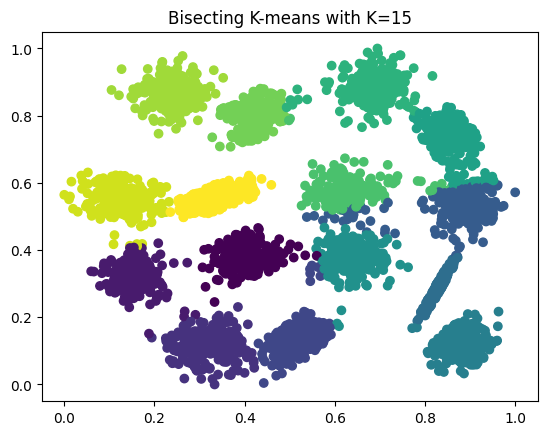

In [ ]:
# Applying Bisecting K-means (check no of iterations)

start_time = time.time()

bisecting_kmeans = BisectingKMeans(n_clusters=15, n_init=1, max_iter=10, bisecting_strategy='biggest_inertia')
bisecting_kmeans.fit(df_normalized)

end_time = time.time()
final_time = end_time - start_time

# Errors

labels = bisecting_kmeans.labels_
centroids = bisecting_kmeans.cluster_centers_

wcss = sum(np.sum((df_normalized[labels == k] - centroids[k])**2).sum() for k in range(len(centroids)))
bcss = sum(len(df_normalized[labels == k]) * np.sum((global_mean - centroids[k])**2) for k in range(len(centroids)))

# Silhouette Coefficient
sil_score = silhouette_score(df_normalized, labels)

print(f'\nExecution Time: {final_time:0.4f} seconds')
print(f'WCSS = {wcss:0.4f}')
print(f'BCSS = {bcss:0.4f}')
print(f"SSE: {(wcss + bcss):0.4f}")
print(f"Silhouette Score: {sil_score:0.4f}\n")

plt.scatter(df_normalized['X'], df_normalized['Y'], c=bisecting_kmeans.labels_)
plt.title("Bisecting K-means with K=15")
plt.show()


Execution Time: 0.0392 seconds
Silhouette Score: 0.7116


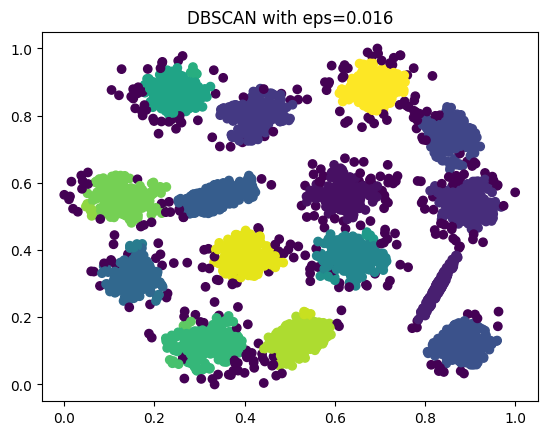

In [ ]:
# Applying DBSCAN

start_time = time.time()

dbscan = DBSCAN(eps=0.016, min_samples=5, algorithm='kd_tree')
dbscan.fit(df_normalized)

end_time = time.time()
final_time = end_time - start_time

# Silhouette Coefficient
sil_score = silhouette_score(df_normalized, labels)

print(f'\nExecution Time: {final_time:0.4f} seconds')
print(f"Silhouette Score: {sil_score:0.4f}")

plt.scatter(df_normalized['X'], df_normalized['Y'], c=dbscan.labels_)
plt.title("DBSCAN with eps=0.016")
plt.show()


Execution Time: 0.3742 seconds
Silhouette Score: -0.0469


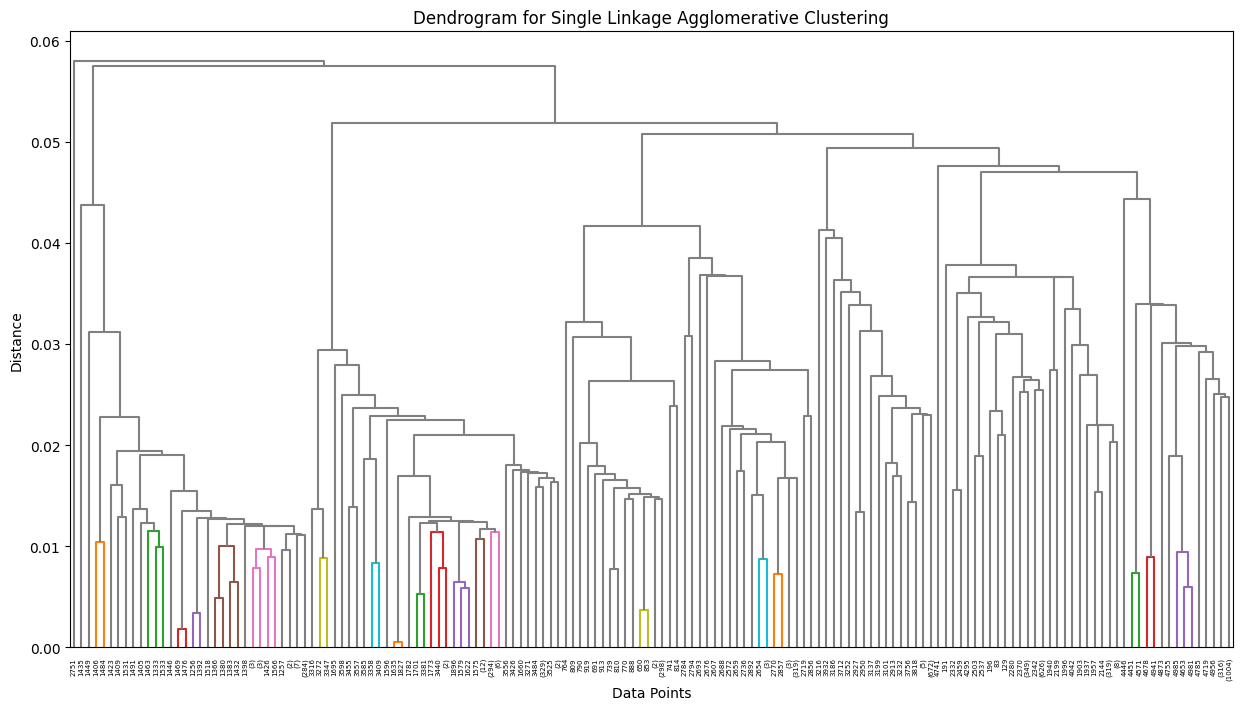

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Single-Link Agglomerative Clustering

start_time = time.time()

single_link = AgglomerativeClustering(n_clusters=15, linkage='single', compute_distances=True)
single_link.fit(df_normalized)

labels = single_link.labels_
linked = linkage(df_normalized, method='single')

end_time = time.time()
final_time = end_time - start_time

# Silhouette Coefficient
sil_score = silhouette_score(df_normalized, labels)

print(f'\nExecution Time: {final_time:0.4f} seconds')
print(f"Silhouette Score: {sil_score:0.4f}")

# Dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked, labels=np.arange(len(df_normalized)), truncate_mode="level", p=15, color_threshold=0.2 * max(linked[:, 2]), above_threshold_color='gray')
plt.title("Dendrogram for Single Linkage Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


Execution Time: 1.3388 seconds
Silhouette Score: 0.6832


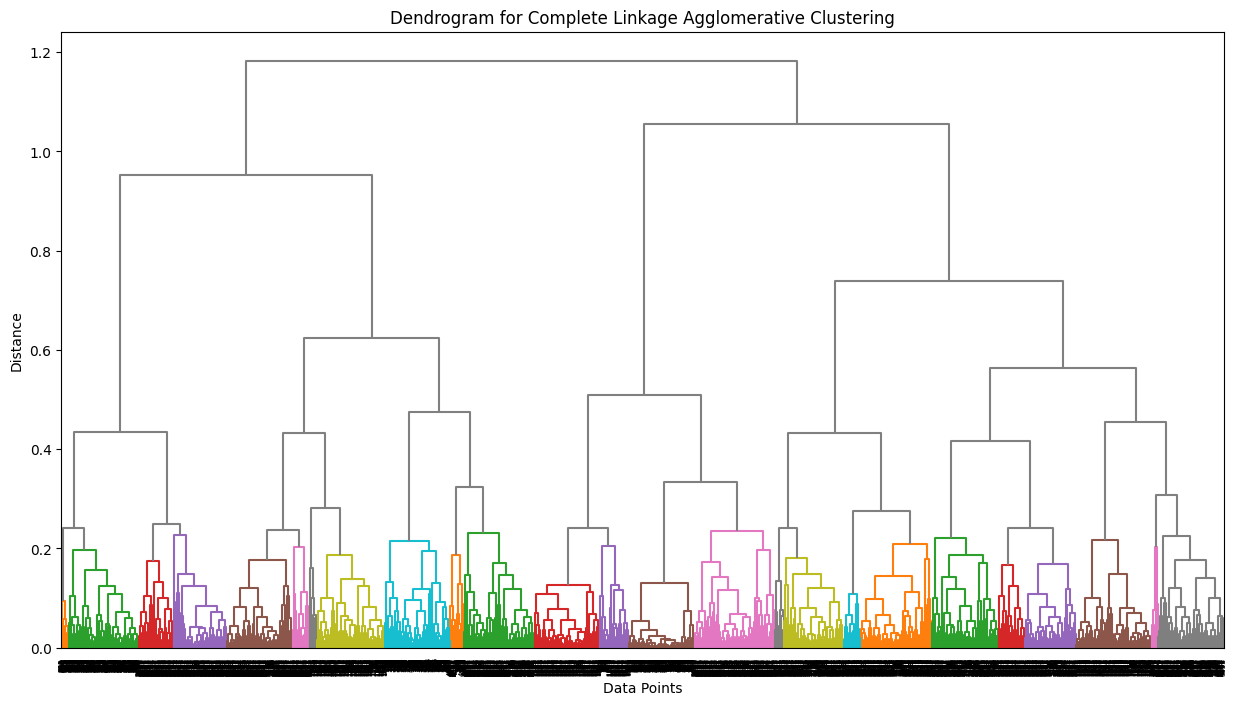

In [ ]:
# Complete-Link Agglomerative Clustering

start_time = time.time()

single_link = AgglomerativeClustering(n_clusters=15, linkage='complete', compute_distances=True)
single_link.fit(df_normalized)

labels = single_link.labels_
linked = linkage(df_normalized, method='complete')

end_time = time.time()
final_time = end_time - start_time

# Silhouette Coefficient
sil_score = silhouette_score(df_normalized, labels)

print(f'\nExecution Time: {final_time:0.4f} seconds')
print(f"Silhouette Score: {sil_score:0.4f}")

# Dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked, labels=np.arange(len(df_normalized)), truncate_mode="level", p=15, color_threshold=0.2 * max(linked[:, 2]), above_threshold_color='gray')
plt.title("Dendrogram for Complete Linkage Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


Execution Time: 1.9115 seconds
Silhouette Score: 0.7085


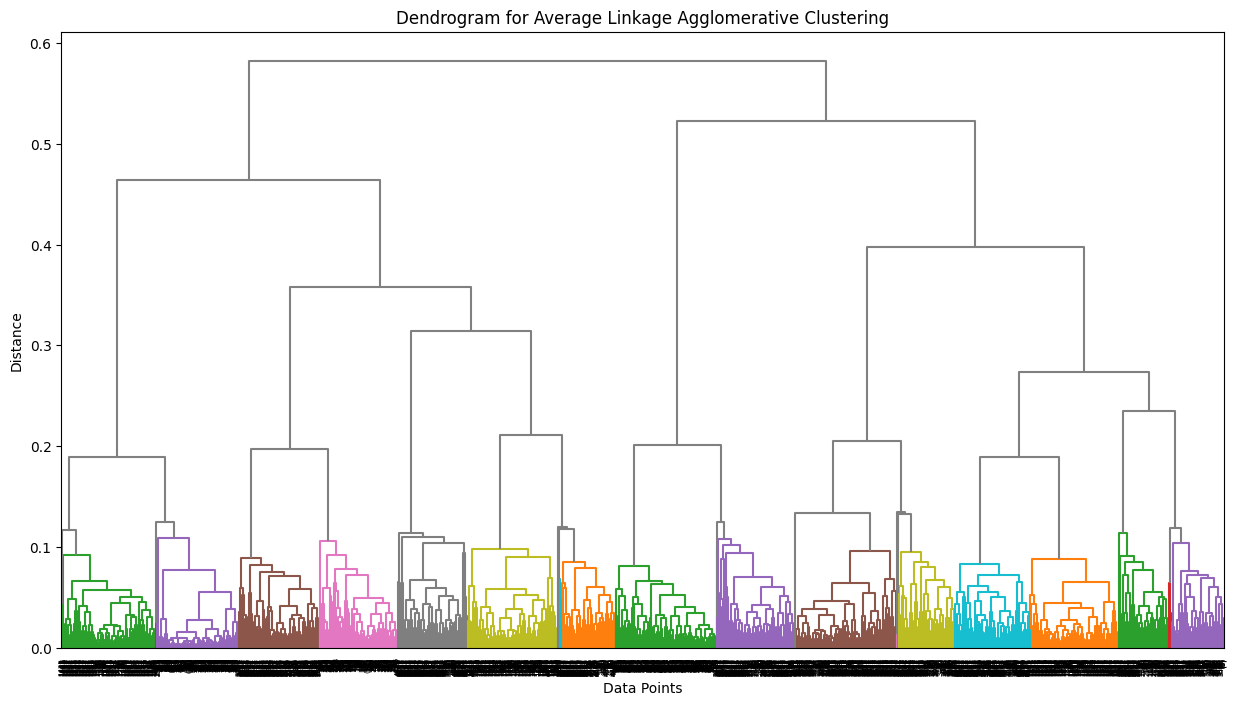

In [ ]:
# Average-Link Agglomerative Clustering

start_time = time.time()

single_link = AgglomerativeClustering(n_clusters=15, linkage='average', compute_distances=True)
single_link.fit(df_normalized)

labels = single_link.labels_
linked = linkage(df_normalized, method='average')

end_time = time.time()
final_time = end_time - start_time

# Silhouette Coefficient
sil_score = silhouette_score(df_normalized, labels)

print(f'\nExecution Time: {final_time:0.4f} seconds')
print(f"Silhouette Score: {sil_score:0.4f}")

# Dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked, labels=np.arange(len(df_normalized)), truncate_mode="level", p=15, color_threshold=0.2 * max(linked[:, 2]), above_threshold_color='gray')
plt.title("Dendrogram for Average Linkage Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)



Execution Time: 0.0107 seconds
Number of iterations: 6
WCSS = 246.5607
BCSS = 418.7799
SSE: 665.3407
Silhouette Score: 0.4151



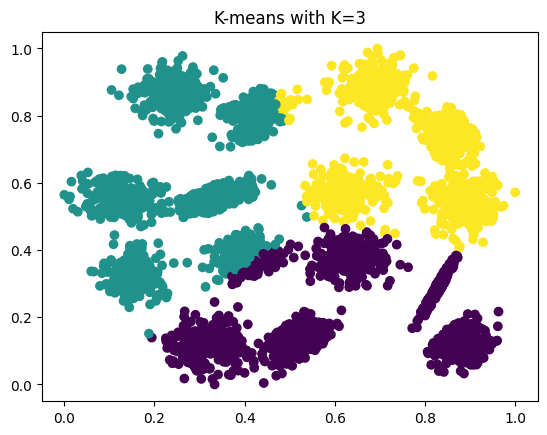

In [28]:
# Part B - Kmeans using different number of clusters

# K = 3

start_time = time.time()

kmeans = KMeans(n_clusters=3)
kmeans.fit(df_normalized)

end_time = time.time()
final_time = end_time - start_time

# Errors

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

wcss = sum(np.sum((df_normalized[labels == k] - centroids[k])**2).sum() for k in range(len(centroids)))
bcss = sum(len(df_normalized[labels == k]) * np.sum((global_mean - centroids[k])**2) for k in range(len(centroids)))

# Silhouette Coefficient
sil_score = silhouette_score(df_normalized, labels)

print(f'\nExecution Time: {final_time:0.4f} seconds')
print("Number of iterations:", kmeans.n_iter_)
print(f'WCSS = {wcss:0.4f}')
print(f'BCSS = {bcss:0.4f}')
print(f"SSE: {(wcss + bcss):0.4f}")
print(f"Silhouette Score: {sil_score:0.4f}\n")

plt.scatter(df_normalized['X'], df_normalized['Y'], c=labels)
plt.title("K-means with K=3")
plt.show()

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)



Execution Time: 0.0136 seconds
Number of iterations: 9
WCSS = 120.9673
BCSS = 544.3614
SSE: 665.3287
Silhouette Score: 0.4658



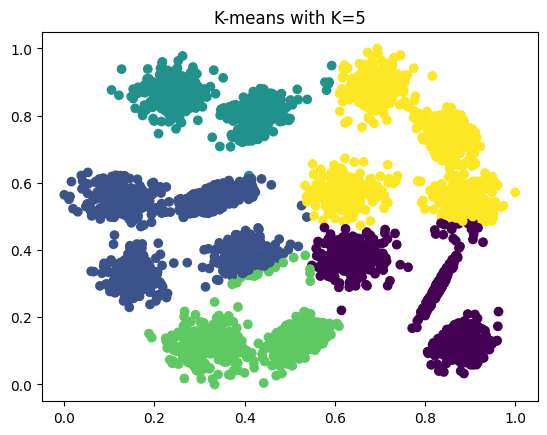

In [25]:
# K = 5

start_time = time.time()

kmeans = KMeans(n_clusters=5)
kmeans.fit(df_normalized)

end_time = time.time()
final_time = end_time - start_time

# Errors

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

wcss = sum(np.sum((df_normalized[labels == k] - centroids[k])**2).sum() for k in range(len(centroids)))
bcss = sum(len(df_normalized[labels == k]) * np.sum((global_mean - centroids[k])**2) for k in range(len(centroids)))

# Silhouette Coefficient
sil_score = silhouette_score(df_normalized, labels)

print(f'\nExecution Time: {final_time:0.4f} seconds')
print("Number of iterations:", kmeans.n_iter_)
print(f'WCSS = {wcss:0.4f}')
print(f'BCSS = {bcss:0.4f}')
print(f"SSE: {(wcss + bcss):0.4f}")
print(f"Silhouette Score: {sil_score:0.4f}\n")

plt.scatter(df_normalized['X'], df_normalized['Y'], c=labels)
plt.title("K-means with K=5")
plt.show()

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)



Execution Time: 0.0113 seconds
Number of iterations: 9
WCSS = 60.8941
BCSS = 604.5156
SSE: 665.4097
Silhouette Score: 0.5347



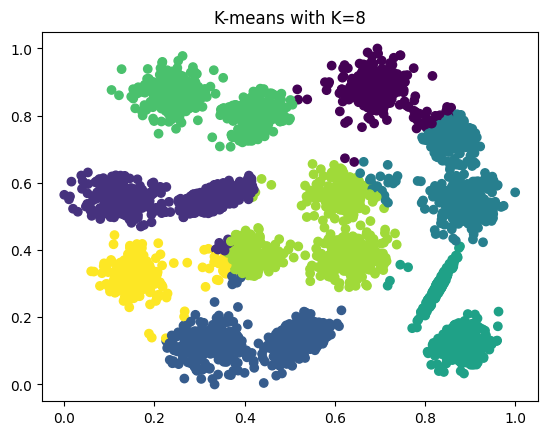

In [22]:
# K = 8

start_time = time.time()

kmeans = KMeans(n_clusters=8)
kmeans.fit(df_normalized)

end_time = time.time()
final_time = end_time - start_time

# Errors

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

wcss = sum(np.sum((df_normalized[labels == k] - centroids[k])**2).sum() for k in range(len(centroids)))
bcss = sum(len(df_normalized[labels == k]) * np.sum((global_mean - centroids[k])**2) for k in range(len(centroids)))

# Silhouette Coefficient
sil_score = silhouette_score(df_normalized, labels)

print(f'\nExecution Time: {final_time:0.4f} seconds')
print("Number of iterations:", kmeans.n_iter_)
print(f'WCSS = {wcss:0.4f}')
print(f'BCSS = {bcss:0.4f}')
print(f"SSE: {(wcss + bcss):0.4f}")
print(f"Silhouette Score: {sil_score:0.4f}\n")

plt.scatter(df_normalized['X'], df_normalized['Y'], c=labels)
plt.title("K-means with K=8")
plt.show()

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)



Execution Time: 0.0160 seconds
Number of iterations: 4
WCSS = 27.4861
BCSS = 637.8800
SSE: 665.3661
Silhouette Score: 0.6366



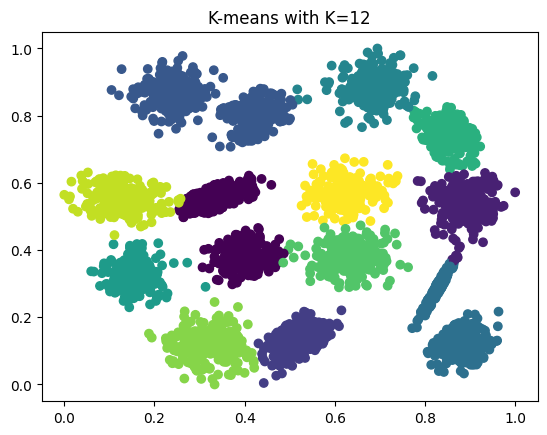

In [19]:
# K = 12

start_time = time.time()

kmeans = KMeans(n_clusters=12)
kmeans.fit(df_normalized)

end_time = time.time()
final_time = end_time - start_time

# Errors

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

wcss = sum(np.sum((df_normalized[labels == k] - centroids[k])**2).sum() for k in range(len(centroids)))
bcss = sum(len(df_normalized[labels == k]) * np.sum((global_mean - centroids[k])**2) for k in range(len(centroids)))

# Silhouette Coefficient
sil_score = silhouette_score(df_normalized, labels)

print(f'\nExecution Time: {final_time:0.4f} seconds')
print("Number of iterations:", kmeans.n_iter_)
print(f'WCSS = {wcss:0.4f}')
print(f'BCSS = {bcss:0.4f}')
print(f"SSE: {(wcss + bcss):0.4f}")
print(f"Silhouette Score: {sil_score:0.4f}\n")

plt.scatter(df_normalized['X'], df_normalized['Y'], c=labels)
plt.title("K-means with K=12")
plt.show()

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)



Execution Time: 0.0241 seconds
Number of iterations: 8
WCSS = 9.3327
BCSS = 656.2640
SSE: 665.5968
Silhouette Score: 0.5979



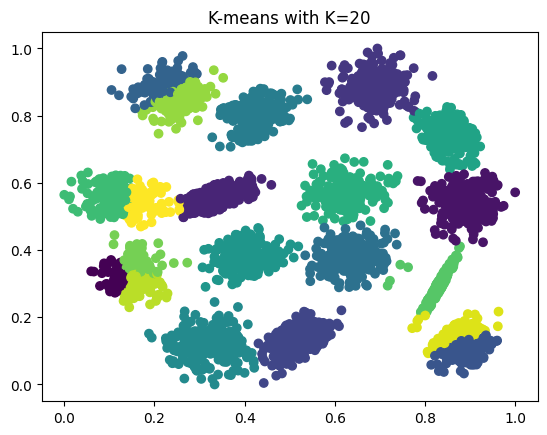

In [16]:
# K = 20

start_time = time.time()

kmeans = KMeans(n_clusters=20)
kmeans.fit(df_normalized)

end_time = time.time()
final_time = end_time - start_time

# Errors

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

wcss = sum(np.sum((df_normalized[labels == k] - centroids[k])**2).sum() for k in range(len(centroids)))
bcss = sum(len(df_normalized[labels == k]) * np.sum((global_mean - centroids[k])**2) for k in range(len(centroids)))

# Silhouette Coefficient
sil_score = silhouette_score(df_normalized, labels)

print(f'\nExecution Time: {final_time:0.4f} seconds')
print("Number of iterations:", kmeans.n_iter_)
print(f'WCSS = {wcss:0.4f}')
print(f'BCSS = {bcss:0.4f}')
print(f"SSE: {(wcss + bcss):0.4f}")
print(f"Silhouette Score: {sil_score:0.4f}\n")

plt.scatter(df_normalized['X'], df_normalized['Y'], c=labels)
plt.title("K-means with K=20")
plt.show()

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

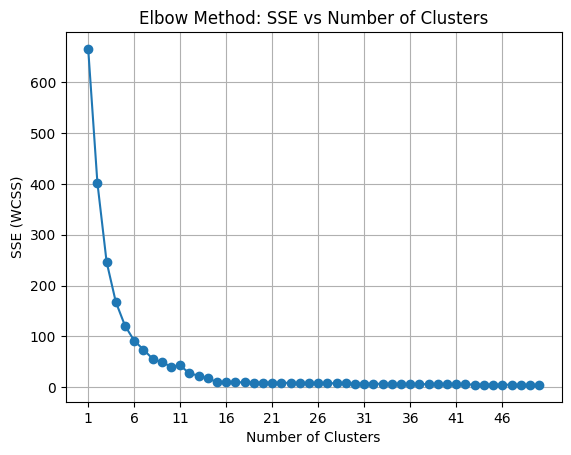

In [ ]:
# Using Elbow Method To Find Optimal K

sse_scores = []

for i in range(1, 51):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    wcss = sum(np.sum((df_normalized[labels == k] - centroids[k])**2).sum() for k in range(len(centroids)))
    sse_scores.append(wcss)

plt.plot(range(1, 51), sse_scores, marker='o', linestyle='-')
plt.title("Elbow Method: SSE vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (WCSS)")
plt.xticks(range(1, 51, 5))
plt.grid(True)
plt.show()
